<a href="https://colab.research.google.com/github/Nawin03-DS/ML-Project/blob/main/Project_Gold_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python project on Gold Price Prediction (2023–2025)**

Step 1: Import Required Libraries

In [ ]:
# Basic data and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

step 2: Load the Data set

In [ ]:
# Load the CSV file
df = pd.read_csv("gold_prices_sample.csv", parse_dates=['Date'])

# Sort by date and set date as index
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Display the first few rows
print(df.head())

               Open     High      Low    Close  Volume
Date                                                  
2023-01-02  1874.91  1869.14  1883.51  1802.03    8610
2023-01-03  1990.14  1836.32  1769.11  1927.22    2993
2023-01-04  1946.40  1981.69  1874.77  1982.66    1869
2023-01-05  1919.73  1916.68  1840.35  1922.51    2014
2023-01-06  1831.20  1880.17  1867.32  1974.74    1602


Step 3: Visualize Gold Price Trends

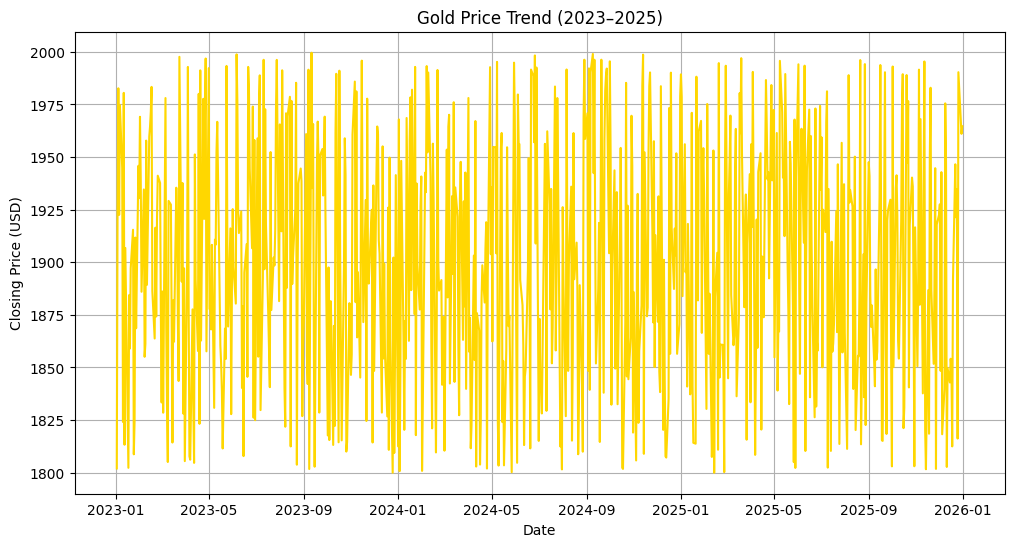

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Close'], color='gold')
plt.title("Gold Price Trend (2023–2025)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()

step 4: future engineering

In [ ]:
# Create 10-day and 30-day moving averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Remove rows with missing values due to rolling window
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_30']]
y = df['Close']

Step 5: Split the Data into Training and Test Sets

In [ ]:
# Use 80% for training, 20% for testing (no shuffling due to time-series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Step 6: Train and Evaluate Models

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.07657354170044917


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest R2 Score: 0.03353795565523654


In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost R2 Score: -0.10810833071765225


Step 7: Compare Actual vs Predicted Prices

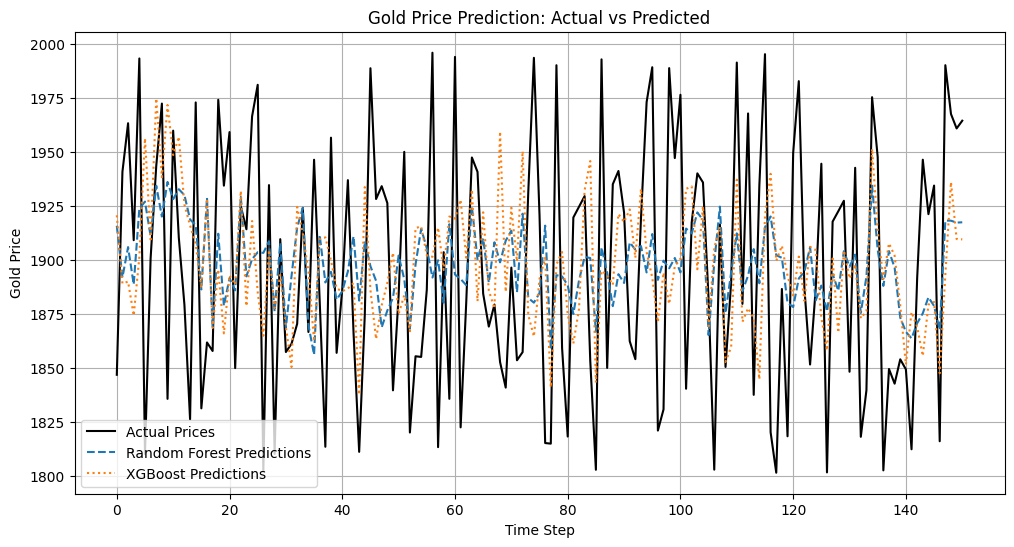

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='black')
plt.plot(y_pred_rf, label='Random Forest Predictions', linestyle='--')
plt.plot(y_pred_xgb, label='XGBoost Predictions', linestyle=':')
plt.title("Gold Price Prediction: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.show()